<div style="background-color: SKYBLUE; padding: 10px; text-align: center;"> 
    
<h1 style="font-weight: bold; font-style: italic;">STROKE ANALYSIS</h1> 
    
</div>

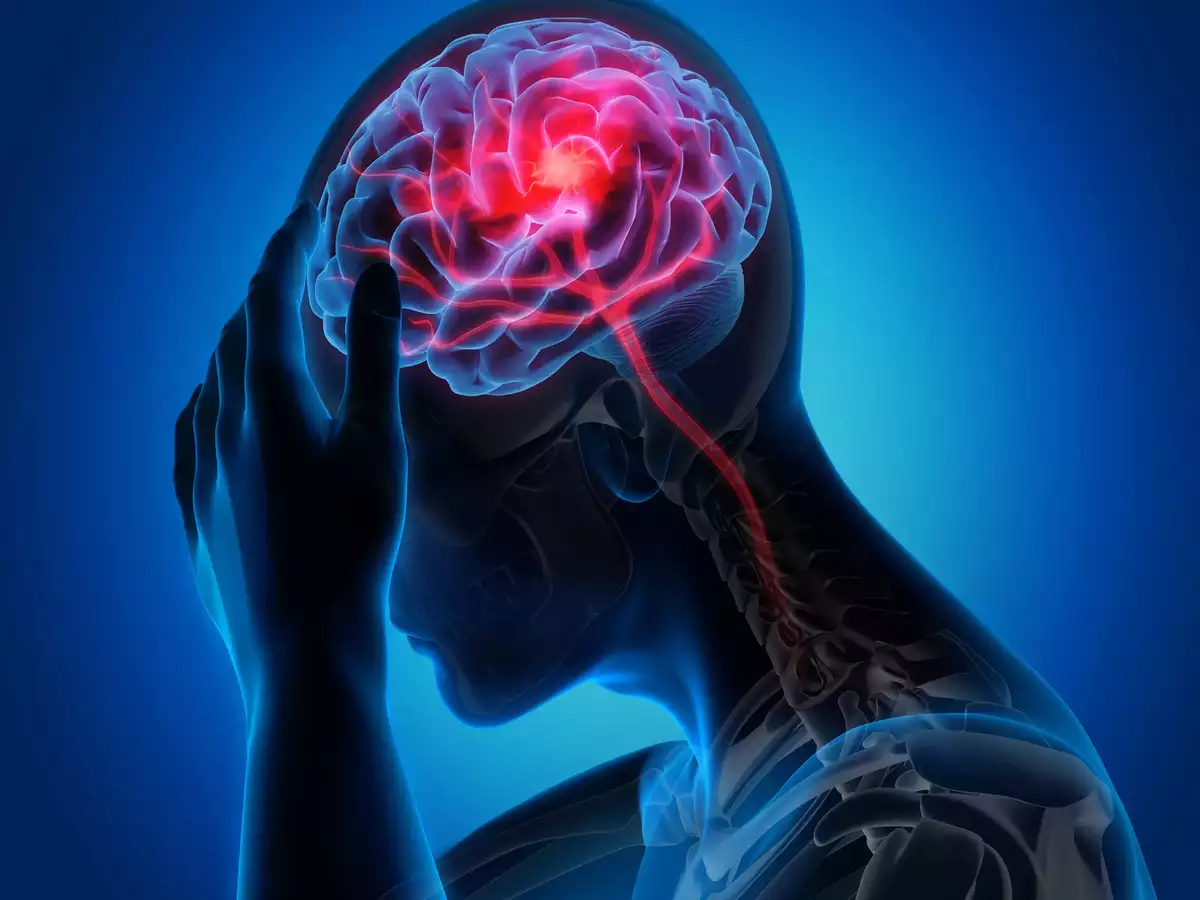

#### Stroke dataset has 10 feature variables and 1 target variable and its classes are balanced. We take stroke as dependent variable. It is a catagorical variable that contains 0 and 1.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,roc_curve
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


In [2]:
df=pd.read_csv('stroke_data.csv')
df.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,40907.0,0.555162,0.496954,0.00,0.00,1.00,1.00,1.00
age,40910.0,51.327255,21.623969,-9.00,35.00,52.00,68.00,103.00
hypertension,40910.0,0.213835,0.410017,0.00,0.00,0.00,0.00,1.00
heart_disease,40910.0,0.127719,0.333781,0.00,0.00,0.00,0.00,1.00
ever_married,40910.0,0.821340,0.383072,0.00,1.00,1.00,1.00,1.00
work_type,40910.0,3.461134,0.780919,0.00,3.00,4.00,4.00,4.00
Residence_type,40910.0,0.514886,0.499784,0.00,0.00,1.00,1.00,1.00
avg_glucose_level,40910.0,122.075901,57.561531,55.12,78.75,97.92,167.59,271.74
bmi,40910.0,30.406355,6.835072,11.50,25.90,29.40,34.10,92.00
smoking_status,40910.0,0.488609,0.499876,0.00,0.00,0.00,1.00,1.00


In [5]:
df.drop(columns=['ever_married','Residence_type'],inplace=True)

In [6]:
df.head()

,sex,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,4,228.69,36.6,1,1
1,1.0,42.0,0,1,4,105.92,32.5,0,1
2,0.0,61.0,0,0,4,171.23,34.4,1,1
3,1.0,41.0,1,0,3,174.12,24.0,0,1
4,1.0,85.0,0,0,4,186.21,29.0,1,1


In [7]:
df.isnull().sum()

sex                  3
age                  0
hypertension         0
heart_disease        0
work_type            0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
df.isnull().mean()*100

sex                  0.007333
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
work_type            0.000000
avg_glucose_level    0.000000
bmi                  0.000000
smoking_status       0.000000
stroke               0.000000
dtype: float64

### <center> Univariate analysis

### Histogram

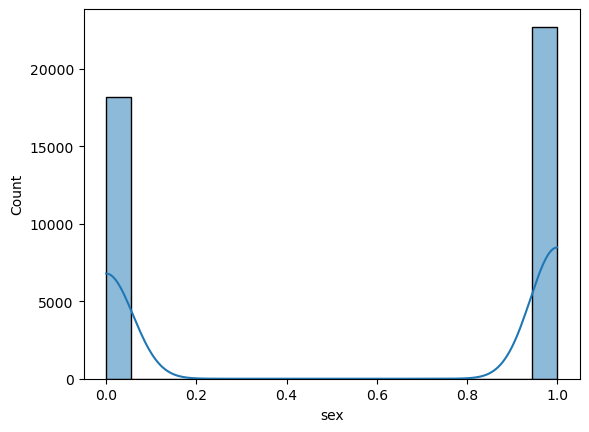

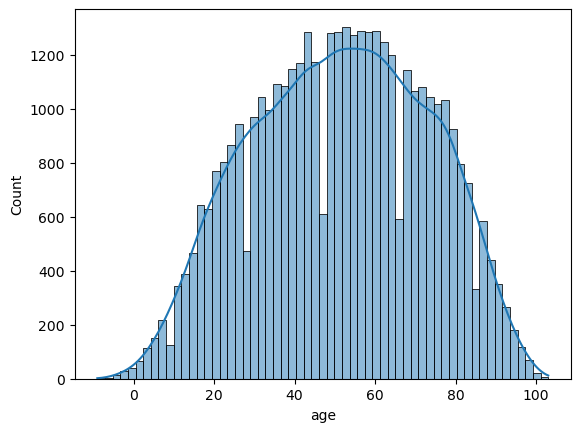

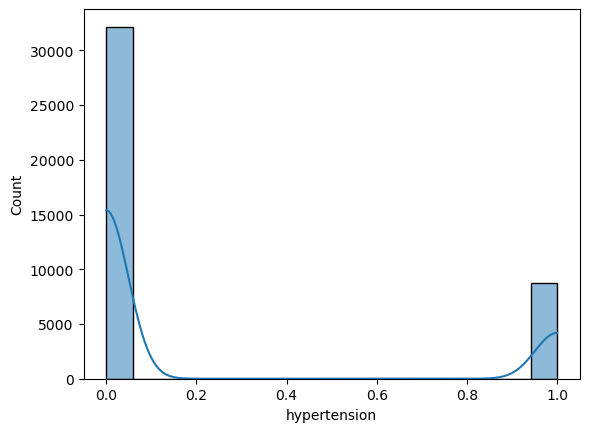

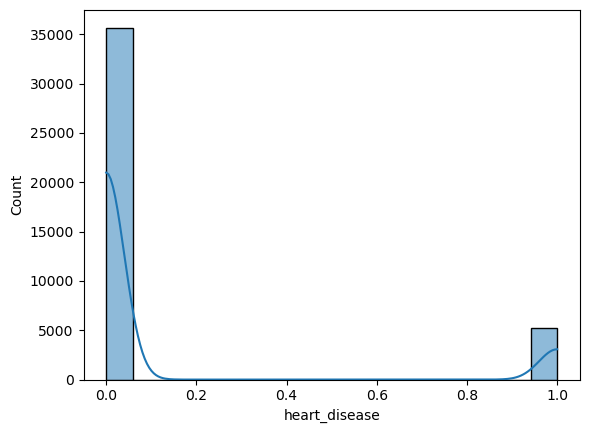

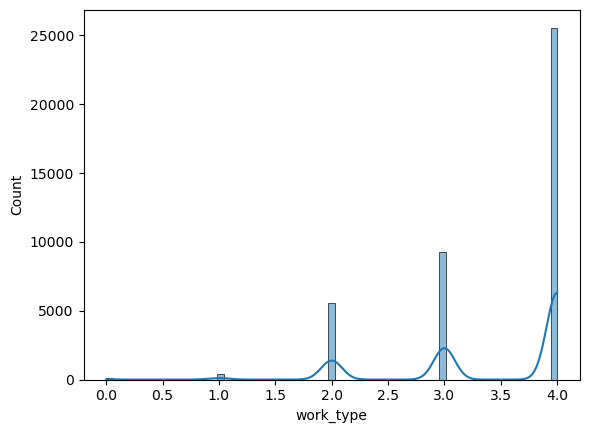

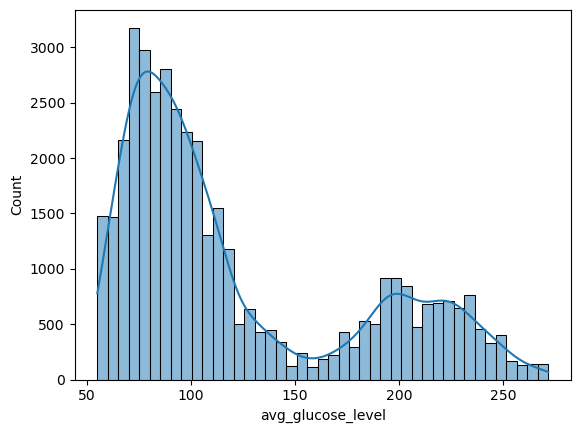

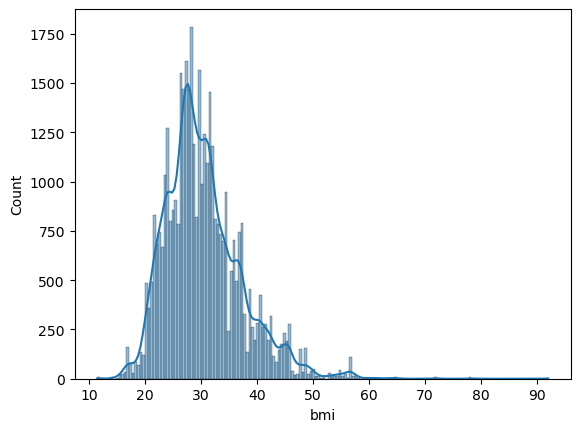

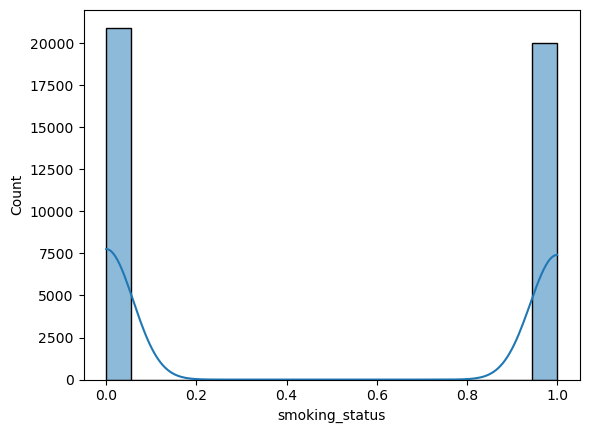

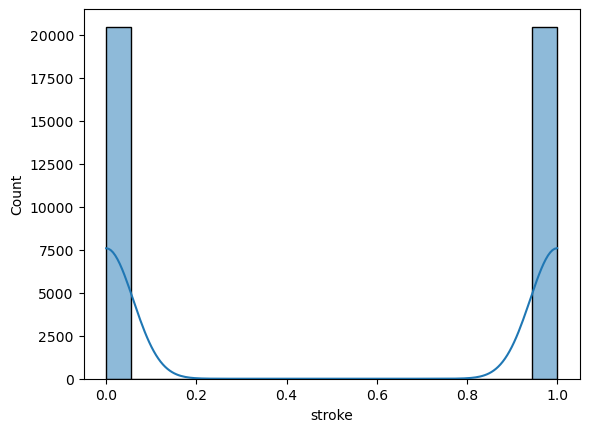

In [9]:
for i in df.columns:
    if df[i].dtypes!='object':
        sns.histplot(x=df[i],kde=True)
        plt.show()

In [10]:
gender_disease = df.groupby(['sex'])['stroke'].sum()

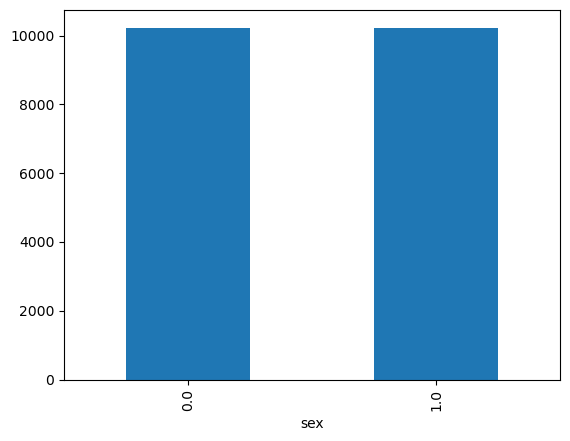

In [11]:
gender_disease.plot.bar();

### Boxplot

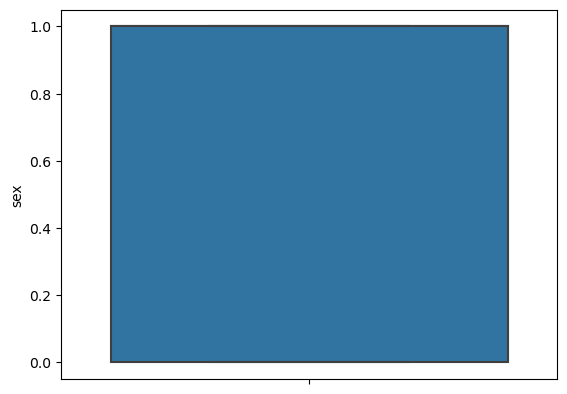

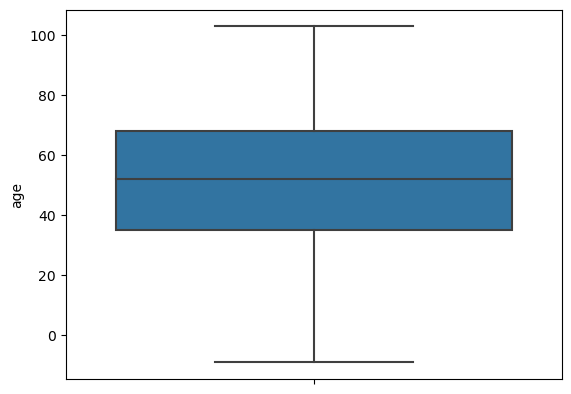

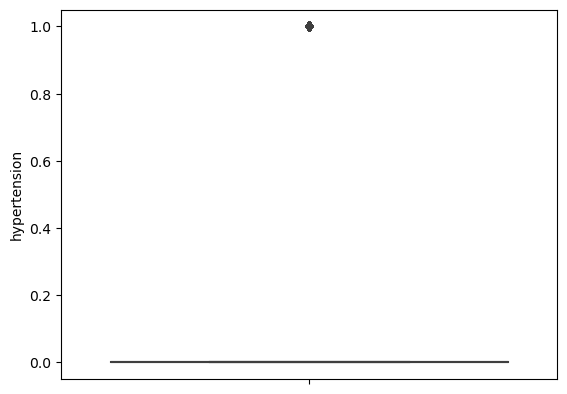

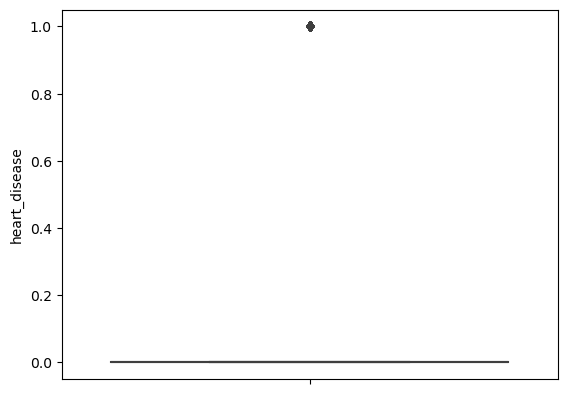

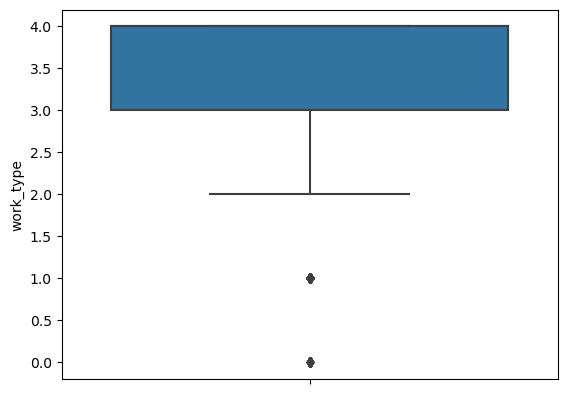

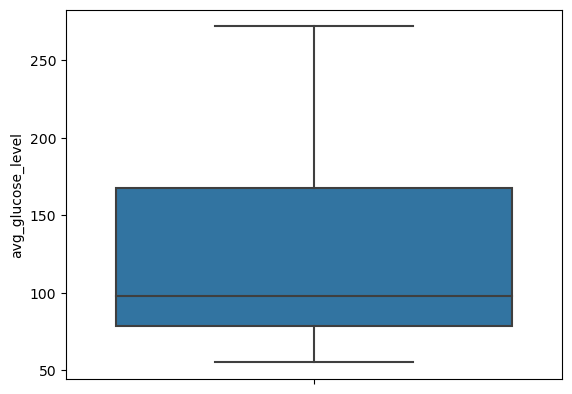

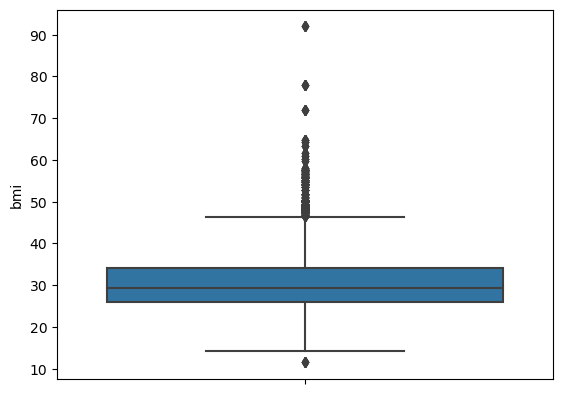

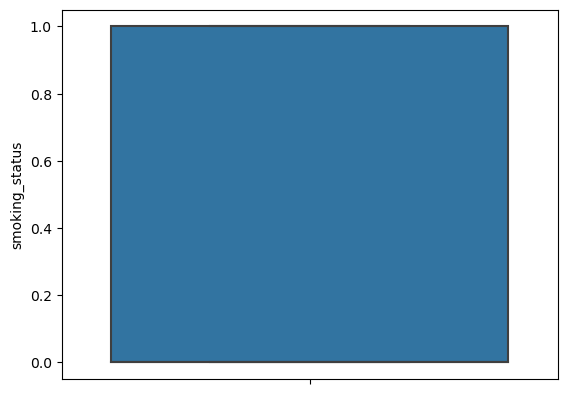

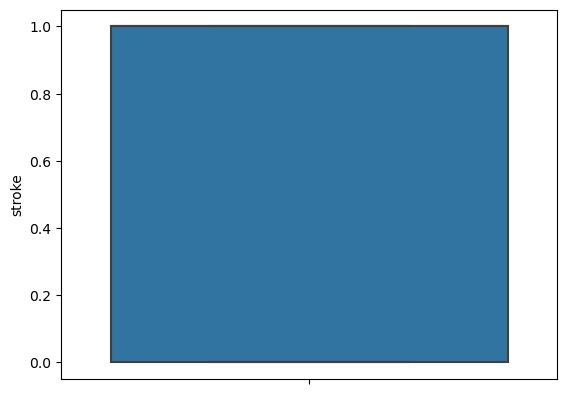

In [12]:
for i in df.columns:
    if df[i].dtypes!='object':
        sns.boxplot(y=df[i])
        plt.show()

### Treating Outlier

In [13]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*Q1
    return UL, LL

In [14]:
for column in df.columns:
    if df[column].dtype != "object":
        UL, LL = outlier_limit(df[column])
        df[column] = np.where((df[column]>UL) | (df[column]<LL),np.nan,df[column])

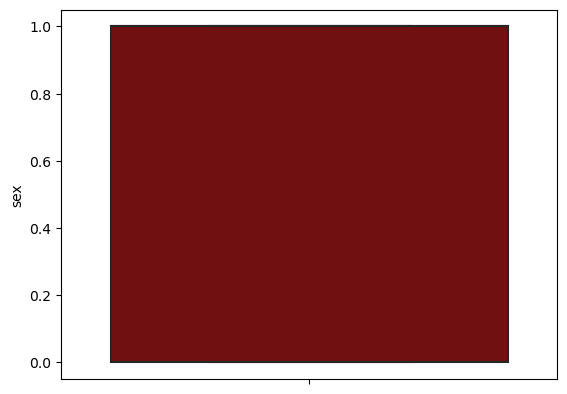

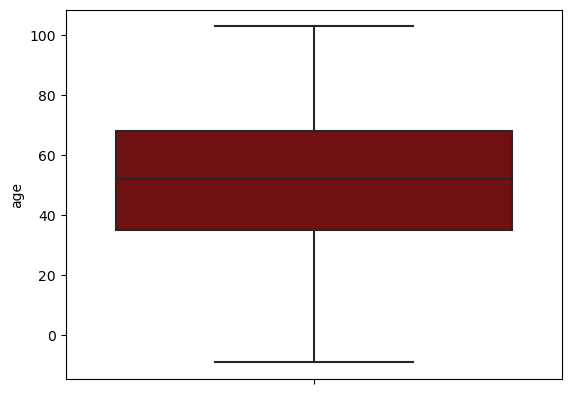

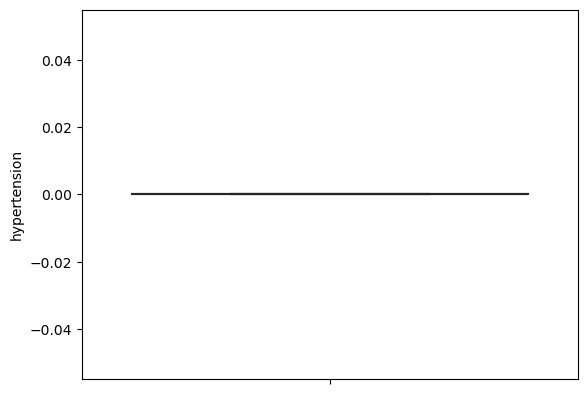

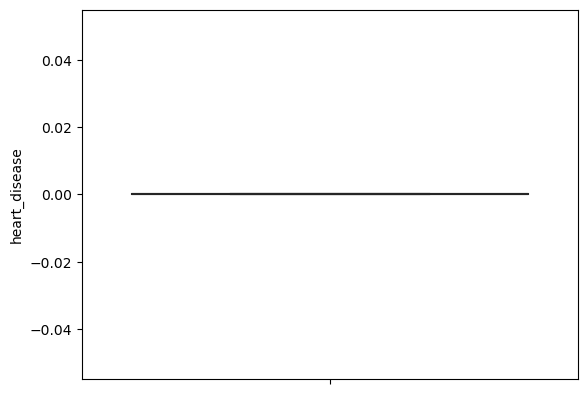

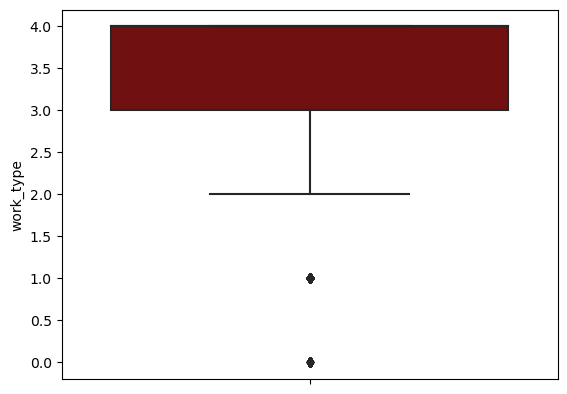

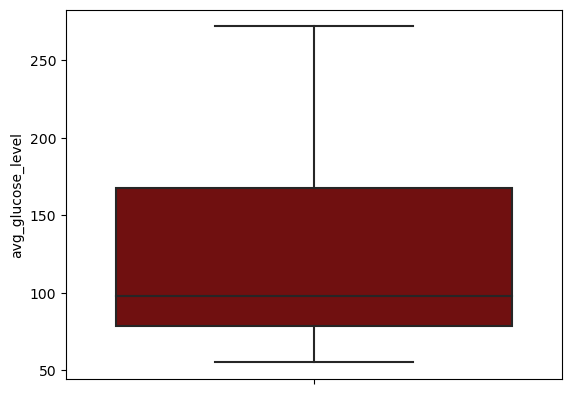

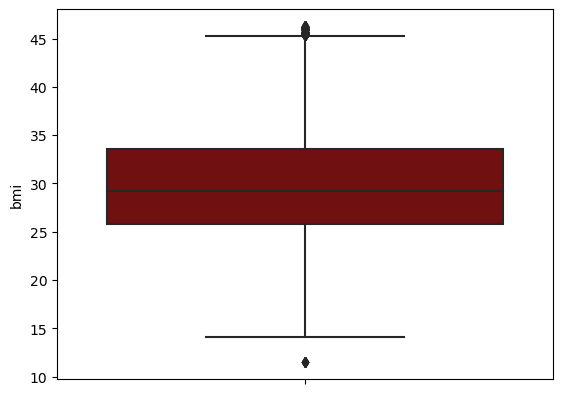

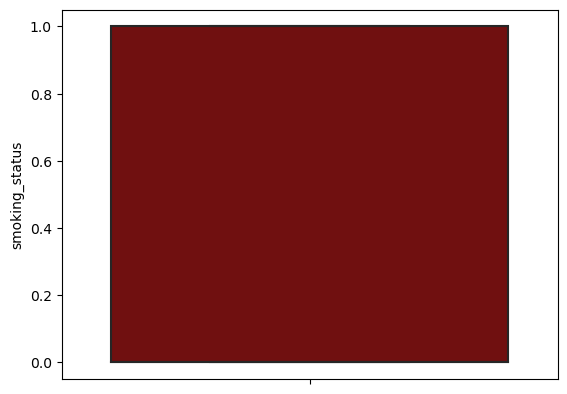

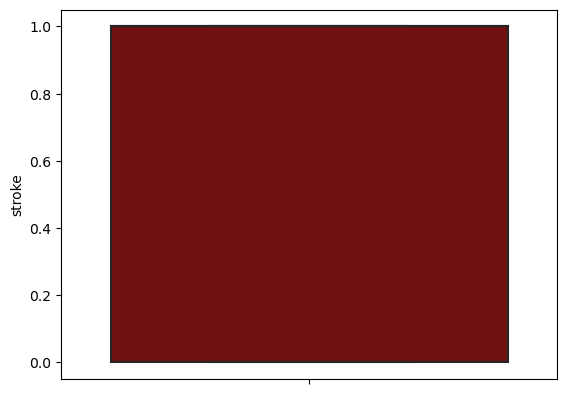

In [15]:
for column in df.columns:
    if df[column].dtype != "object":
        sns.boxplot(y = df[column], color="maroon")
        plt.show()

In [16]:
df.isnull().mean()*100

sex                   0.007333
age                   0.000000
hypertension         21.383525
heart_disease        12.771938
work_type             0.000000
avg_glucose_level     0.000000
bmi                   2.236617
smoking_status        0.000000
stroke                0.000000
dtype: float64

In [17]:
df.dropna(inplace=True)

In [18]:
df.isnull().sum()

sex                  0
age                  0
hypertension         0
heart_disease        0
work_type            0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [19]:
df.stroke.value_counts()

0.0    16956
1.0    10862
Name: stroke, dtype: int64

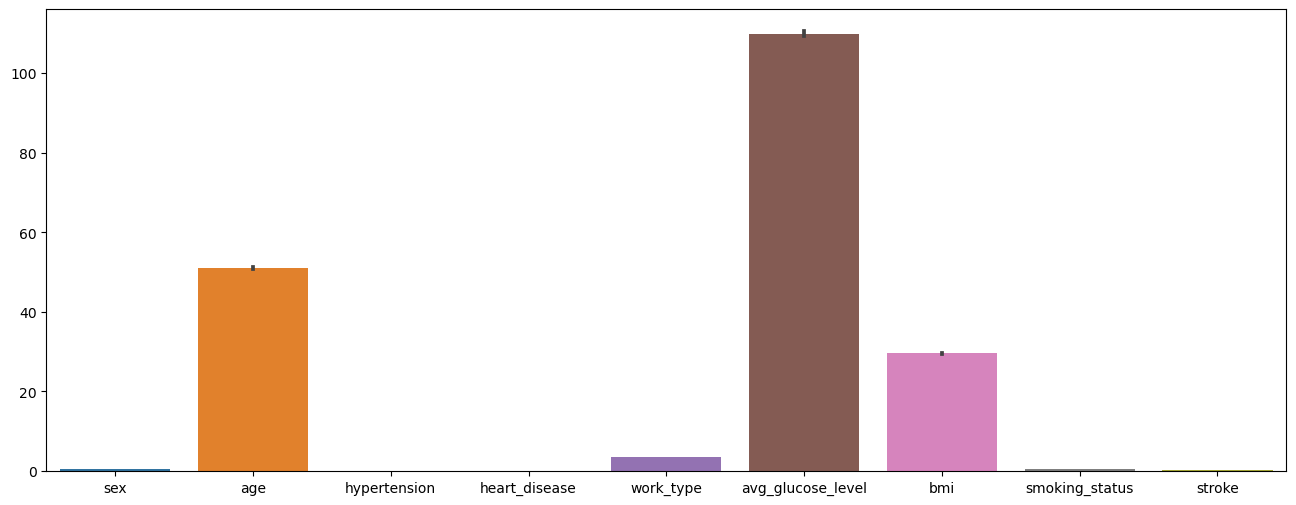

In [45]:
plt.figure(figsize=(16,6))
sns.barplot(data=df)
plt.show()

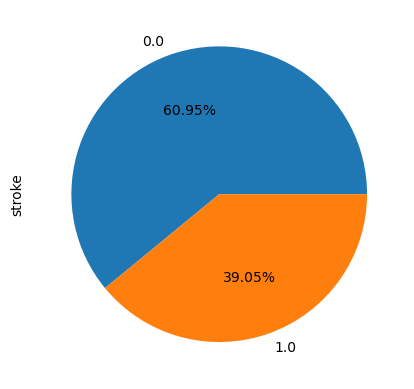

In [47]:
df.stroke.value_counts().plot.pie(autopct = '%1.2f%%');

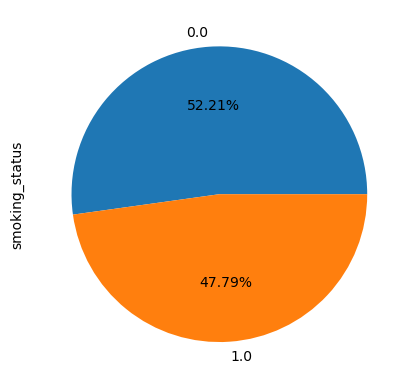

In [46]:
df.smoking_status.value_counts().plot.pie(autopct = '%1.2f%%');

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27818 entries, 2 to 40909
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                27818 non-null  float64
 1   age                27818 non-null  float64
 2   hypertension       27818 non-null  float64
 3   heart_disease      27818 non-null  float64
 4   work_type          27818 non-null  float64
 5   avg_glucose_level  27818 non-null  float64
 6   bmi                27818 non-null  float64
 7   smoking_status     27818 non-null  float64
 8   stroke             27818 non-null  float64
dtypes: float64(9)
memory usage: 2.1 MB


### Checking the correlation with the target 'stroke'

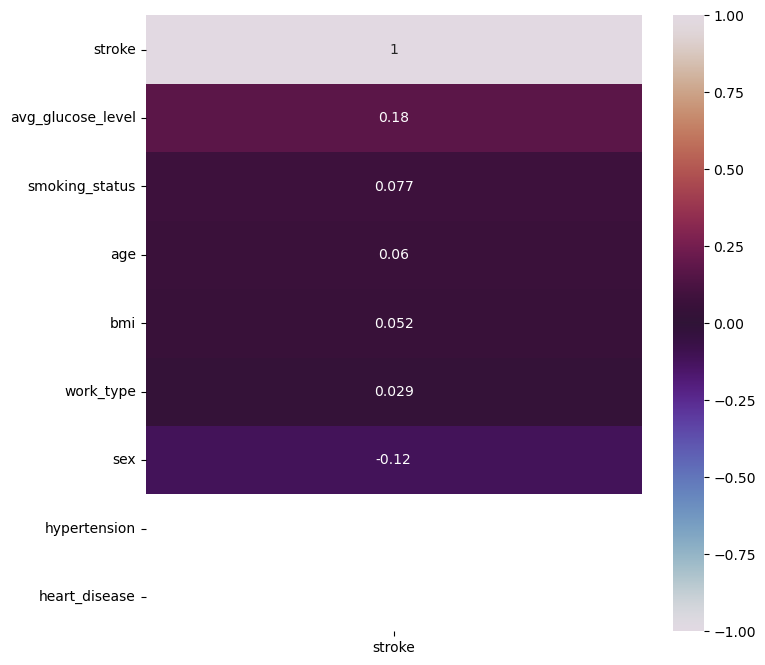

In [24]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr()[["stroke"]].sort_values(by="stroke", ascending=False), vmin=-1, vmax=1,annot=True, cmap="twilight");

### Lets take only the columns with good correlation with the target

In [25]:
x=df[['avg_glucose_level','smoking_status']].values
y=df[['stroke']].values

### Model Building

In [26]:
models={
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'SVC': SVC(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'LogisticRegression': LogisticRegression(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'RandomForestClassifier': RandomForestClassifier()
}

### Cross validation

In [27]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, cv=10, n_jobs=-1)
    print("cross validation model : {}".format(name))
    Average_score = np.mean(scores)
    print("Average score: ", Average_score)
    print("*"*100)

cross validation model : DecisionTreeClassifier
Average score:  0.9972679585282798
****************************************************************************************************
cross validation model : SVC
Average score:  0.642821073780152
****************************************************************************************************
cross validation model : GradientBoostingClassifier
Average score:  0.8584730626922805
****************************************************************************************************
cross validation model : LogisticRegression
Average score:  0.6405563608040696
****************************************************************************************************
cross validation model : AdaBoostClassifier
Average score:  0.6958801392110529
****************************************************************************************************
cross validation model : RandomForestClassifier
Average score:  0.9972679585282798
*********************

### We can see that "RandomForestClassifier" is having the best overall perfomance so far. We may proceed with it.

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [29]:
model=RandomForestClassifier()

In [30]:
model.fit(x_train,y_train)
print("model traines with {}".format(model))
training_score = model.score(x_train, y_train)*100
testing_score = model.score(x_test, y_test)*100
print("training_score: ", training_score)
print("testing_score: ", testing_score)

model traines with RandomForestClassifier()
training_score:  99.72139840028758
testing_score:  99.74838245866283


In [31]:
y_predict=model.predict(x)

In [32]:
output=pd.DataFrame(zip(y,y_predict),columns=("ACTUAL","PREDICTED"),dtype=float)
output.head()

,ACTUAL,PREDICTED
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0


Model used is::  RandomForestClassifier()


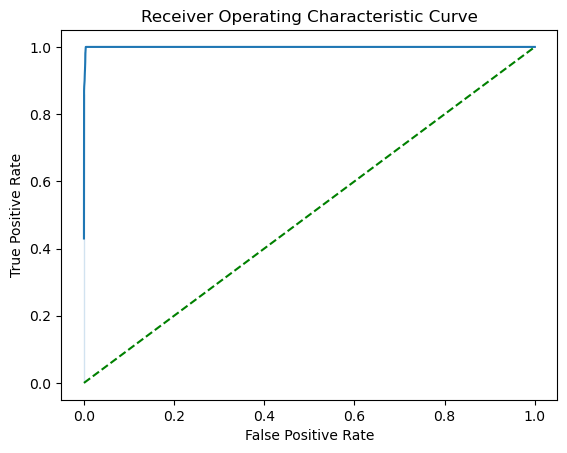

In [33]:
model.fit(x_train, y_train)
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print("Model used is:: ",model)
sns.lineplot(x= fpr, y=tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.show()

### Graph showing the performance of a classification model 'RandomForestClassifier' as a perfect classifier.